In [1]:
from simulation import generate_dataset
from himalaya.backend import set_backend

set_backend("cupy", on_error="warn")

/home/leo/git/compare_variance_residual/venv/lib/python3.12/site-packages/himalaya/backend/_utils.py:55: UserWarning: Setting backend to cupy failed: Cupy not installed..Falling back to numpy backend.
  warnings.warn(f"Setting backend to {backend} failed: {str(error)}."


<module 'himalaya.backend.numpy' from '/home/leo/git/compare_variance_residual/venv/lib/python3.12/site-packages/himalaya/backend/numpy.py'>

In [13]:
feature_space_dimensions = [
    100,  # share
    100,  # unique 0
    100,  # unique 1
]
scalars = [
    1 / 3,
    1 / 3,
    1 / 3,
]
n_targets = 1000
n_samples_train = 1000
n_samples_test = 100
noise = 0.0


In [14]:
(Xs_train, Xs_test, Y_train, Y_test) = generate_dataset(feature_space_dimensions, scalars, n_targets, n_samples_train,
                                                        n_samples_test, noise)

# Variance Partitioning

In [15]:
from variance_partitioning import variance_partitioning

In [16]:
(score_0, score_1, joint_score, x0_unique, x1_unique, shared) = variance_partitioning(Xs_train, Xs_test, Y_train, Y_test)

/home/leo/git/compare_variance_residual/venv/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The GroupRidgeCV or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/home/leo/git/compare_variance_residual/venv/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The RidgeCV or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.Outli

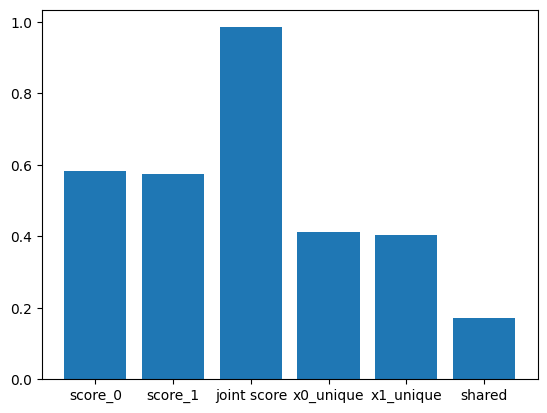

In [18]:
import matplotlib.pyplot as plt
plt.bar(range(6), [score_0.mean(), score_1.mean(), joint_score.mean(), x0_unique.mean(), x1_unique.mean(), shared.mean()])
plt.xticks(range(6), labels=["score_0", "score_1", "joint score", "x0_unique", "x1_unique", "shared"])
plt.show()

# Residual Method